In [1]:
# !pip install nonlinear_benchmarks

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import nonlinear_benchmarks

In [3]:
# %matplotlib widget

Let us consider a very basic robot whose inverse dynamic model (IDM) is:

$$ \tau(t) = M\ddot q(t) + F_v \dot q(t) + F_c \text{sign}(\dot q(t)) + b$$


The IDM can be written as:

$$ \tau = \phi(t) \theta, \qquad \phi(t) = [\ddot q(t)\, \dot q(t)\, \text{sign}(q(t))\, 1], \qquad \theta = [M\, F_v\, F_c\, b]^\top$$

In [4]:
train, test = nonlinear_benchmarks.EMPS(atleast_2d=True)
#test, train = nonlinear_benchmarks.EMPS(atleast_2d=True)
train_tau, train_q = train
test_tau, test_q = test
fs = 1000 # sampling time (Hz)
gtau = 35.1507 # conversion from V to N (N/V)

In [5]:
ts = 1/fs

In [6]:
# Low-pass filter
fh = 5 * 20.0
fnyq = fs / 2
nfilt = 4
[b, a] = sp.signal.butter(nfilt, fh / fnyq)

In [7]:
train_tau *= gtau
train_qf = sp.signal.filtfilt(b,a,train_q, axis=0)
#train_dq = (train_qf[1:] - train_qf[:-1]) / ts #(train_q[1:] - train_q[:-1]) / ts
#train_dq = np.r_[train_dq[[0], :], train_dq]
train_dq = np.gradient(train_qf, ts, axis=0) 

#train_ddq = (train_dq[1:] - train_dq[:-1]) / ts
#train_ddq = np.r_[train_ddq[[0], :], train_ddq]
train_ddq = np.gradient(train_dq, ts, axis=0) 

In [8]:
test_tau *= gtau
test_qf = sp.signal.filtfilt(b,a,test_q, axis=0)
#test_dq = (test_qf[1:] - test_qf[:-1]) / ts #(train_q[1:] - train_q[:-1]) / ts
#test_dq = np.r_[test_dq[[0], :], test_dq]
test_dq = np.gradient(test_q, ts, axis=0)

#test_ddq = (test_dq[1:] - test_dq[:-1]) / ts
#test_ddq = np.r_[test_ddq[[0], :], test_ddq]
test_ddq = np.gradient(test_dq, ts, axis=0)

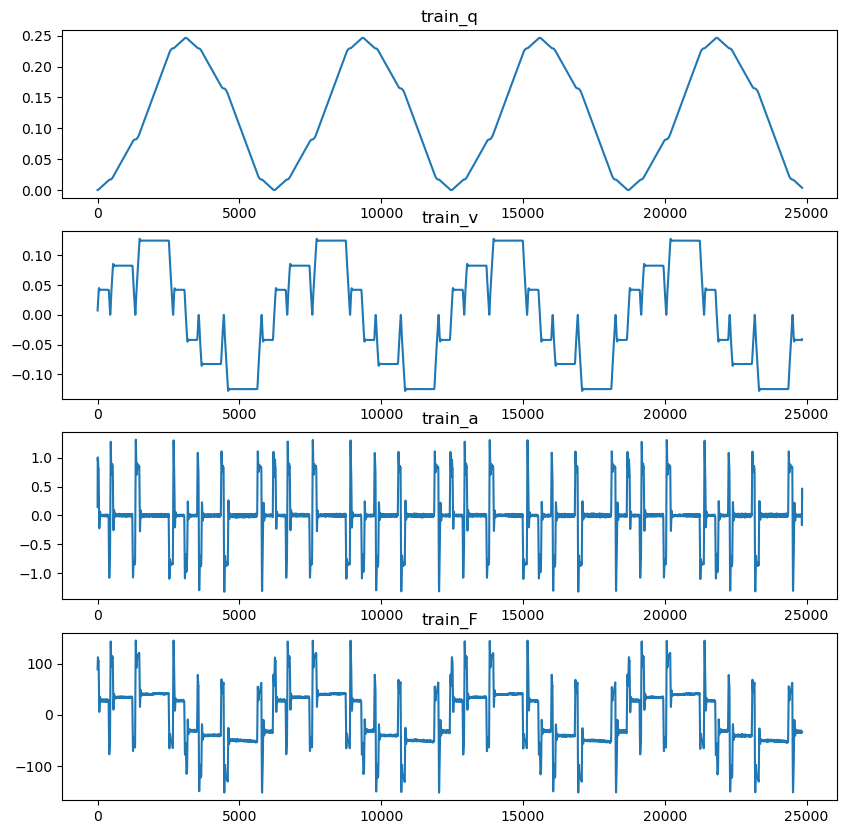

In [9]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ax[0].plot(train_q)
ax[0].set_title('train_q')
ax[1].plot(train_dq)
ax[1].set_title('train_v')
ax[2].plot(train_ddq)
ax[2].set_title('train_a')
ax[3].plot(train_tau)
ax[3].set_title('train_F');

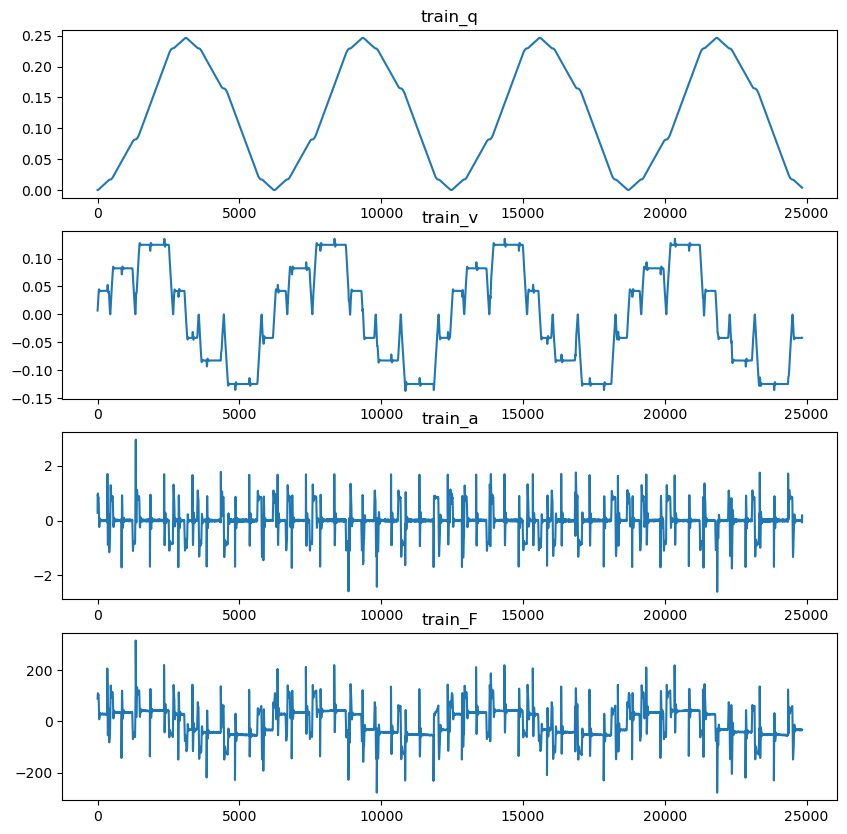

In [10]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ax[0].plot(test_q)
ax[0].set_title('train_q')
ax[1].plot(test_dq)
ax[1].set_title('train_v')
ax[2].plot(test_ddq)
ax[2].set_title('train_a')
ax[3].plot(test_tau)
ax[3].set_title('train_F');

In [11]:
# save data
sp.io.savemat('EMPS.mat', {'train_tau': train_tau, 'train_q': train_q, 'train_dq': train_dq, 'train_ddq': train_ddq, 'test_tau': test_tau, 'test_q': test_q, 'test_dq': test_dq, 'test_ddq': test_ddq, 'ts': ts})